In [7]:
# Init
import numpy as np
import cv2
import matplotlib.pyplot as plt

L = 256
image = cv2.imread('xray.jpg')

# Implementations with and without numpy functions for comparison
# Both have been tested and (should) produce the same results

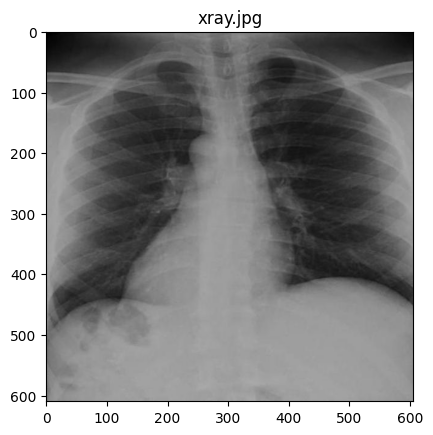

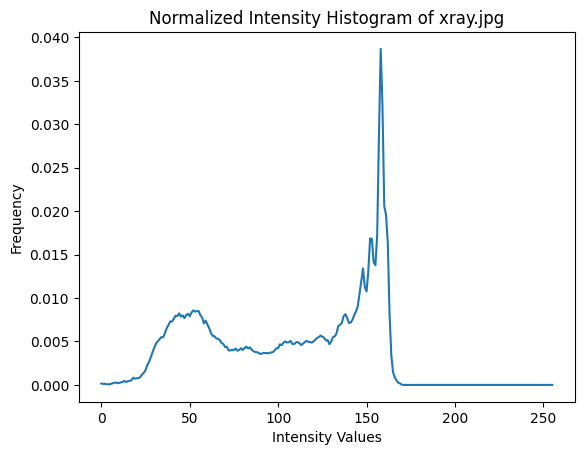

In [8]:
# [1] Calculate the normalized intensity histogram

# done with np functions
hist, bins = np.histogram(image.flatten(), L, [0, L], density=True)

# done without np functions
hist = np.zeros(L)
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        hist[image[i, j]] += 1
# normalized
hist /= image.shape[0] * image.shape[1]

#show the image
plt.imshow(image)
plt.title('xray.jpg')
plt.show()

# show its histogram
plt.plot(hist)
plt.title('Normalized Intensity Histogram of xray.jpg')
plt.xlabel('Intensity Values')
plt.ylabel('Frequency')
plt.show()

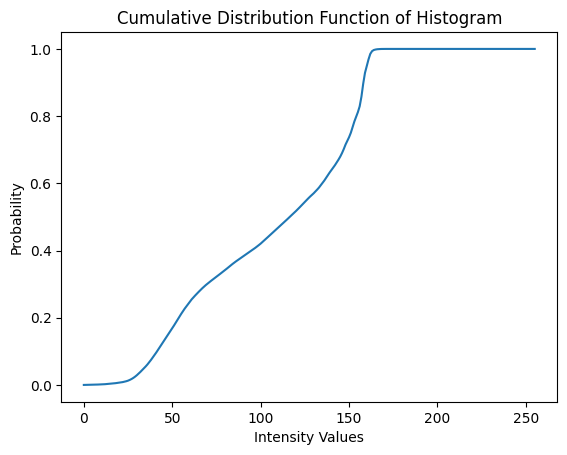

In [9]:
# [2] Calculate the cumulative histogram

# done with np functions
cdf = np.cumsum(hist)

# done without np functions
cdf = np.zeros(L)
cdf[0] = hist[0]
for i in range(1, L):
    cdf[i] = cdf[i - 1] + hist[i]
        
# show the cumulative histogram
plt.plot(cdf)
plt.title('Cumulative Distribution Function of Histogram')
plt.xlabel('Intensity Values')
plt.ylabel('Probability')
plt.show()

(610, 606, 3)


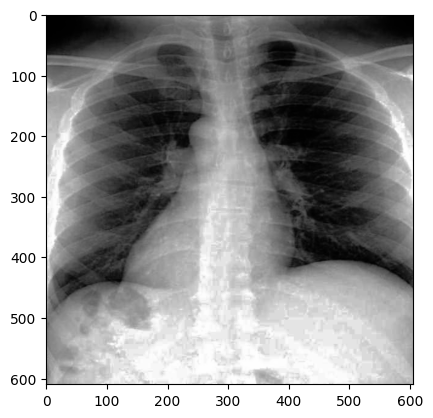

In [10]:
# [3] Apply the intensity transformation function
# s_k=T(r_k)=(L-1)⋅cdf(r_k)

# creat the transformation function
T = (L - 1) * cdf

# apply the transformation function
histEqualizedImage = T[image]

# convert to uint8 for display
histEqualizedImage = histEqualizedImage.astype(np.uint8)

# show the histogram-equalized image
plt.imshow(histEqualizedImage)

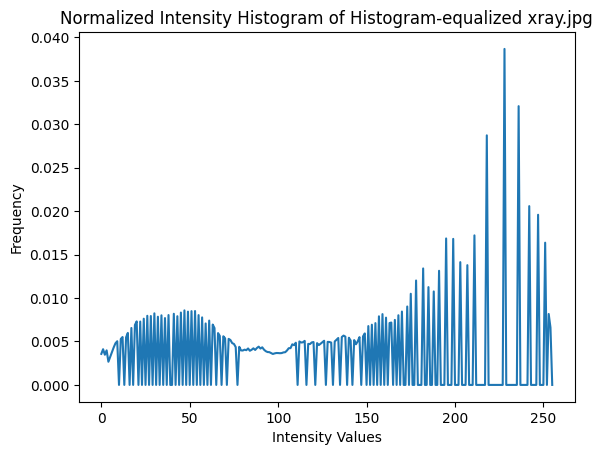

In [11]:
# [4] Calculate the normalized intensity histogram of the histogram-equalized image

# done with np functions
newHist, bins = np.histogram(histEqualizedImage.flatten(), L, [0, L], density=True)

# done without np functions
newHist = np.zeros(L)
for i in range(histEqualizedImage.shape[0]):
    for j in range(histEqualizedImage.shape[1]):
        newHist[histEqualizedImage[i, j]] += 1
# normalized
newHist /= histEqualizedImage.shape[0] * histEqualizedImage.shape[1]

# show the normalized intensity histogram of the histogram-equalized image
plt.plot(newHist)
plt.title('Normalized Intensity Histogram of Histogram-equalized xray.jpg')
plt.xlabel('Intensity Values')
plt.ylabel('Frequency')
plt.show()